In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
%config InlineBackend.figure_format = 'retina'

# Binary search

In [2]:
def binsearch(a,x):
    left = 0; right = len(a)-1
    while left<=right:    
        mid = int((left + right)/2)
        if a[mid]==x: return mid 
        if x < a[mid]: right = mid-1
        else: left = mid+1
    return -1

In [3]:
binsearch(range(10), 333)

-1

In [4]:
def binsearch(a,x,left,right):
    print(left, right)
    if left > right: return -1
    mid = int((left + right)/2)
    if a[mid]==x: return mid 
    if x < a[mid]:
        return binsearch(a,x,left,mid-1)
    else:
        return binsearch(a,x,mid+1,right)

a = range(10)
n = len(a)
binsearch(a,5,0,n-1)

0 9
5 9
5 6


5

# Rabin-Karp hash search

## get some text to search

In [5]:
html = requests.get('https://en.wikipedia.org/wiki/Doughnut').text
soup = BeautifulSoup(html, features="html.parser")
donuts = soup.get_text().lower()
donuts[0:100]

'\n\n\n\ndoughnut - wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ndoughnut\n\nfrom wikipedia, the free encyclop'

In [6]:
html = requests.get('https://en.wikipedia.org/wiki/Tofu').text
soup = BeautifulSoup(html, features="html.parser")
tofu = soup.get_text().lower()
tofu[0:100]

'\n\n\n\ntofu - wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ntofu\n\nfrom wikipedia, the free encyclopedia\n\n\n'

In [7]:
bigdoc = donuts+' '+tofu

## naive hash computation

In [8]:
def hash(s:str)->int:
    return sum(ord(c) for c in s)

def search(doc, s) -> int:
    n = len(doc); m = len(s)
    hs = hash(s)
    for i in range(0,n-m+1):
        hdoc = hash(doc[i:i+m]) # slow O(m)
        if hdoc==hs and s==doc[i:i+m]:
            return i
    return -1

In [9]:
doc = """Porchetta food truck Roli Roti and the Mission’s Dynamo Donut
are teaming up once again on a one-day-only donut porchetta sandwich,
which is exactly what it sounds like. The donuts serving as bread are
flavored with onion and thyme, holding juicy slices of porchetta straight
from the rotisserie."""

In [10]:
search(doc, "Roli Roti"), search(doc, "Porch"), search(doc, "foobar"), search(doc, "rie.")

(21, 0, -1, 292)

In [11]:
%time search(bigdoc, "cultural significance of tofu")

CPU times: user 303 ms, sys: 8.02 ms, total: 311 ms
Wall time: 314 ms


135951

In [12]:
def hash(s:str, n)->int:
    return sum(ord(s[i]) for i in range(n))

def search(doc, s) -> int:
    n = len(doc); m = len(s)
    hs = hash(s,m)
    hdoc = hash(doc,m)  # init rolling hash
    for i in range(0,n-m+1):
        # print(f"i={i}, n={n}, m={m}")
        if hdoc==hs and s==doc[i:i+m]:
            return i
        next = ord(doc[i+m]) if i+m<n else 0
        hdoc = hdoc - ord(doc[i]) + next  # roll it!
    return -1

In [13]:
search(doc, "Roli Roti"), search(doc, "Porch"), search(doc, "foobar"), search(doc, "rie.")

(21, 0, -1, 292)

In [14]:
%time search(bigdoc, "cultural significance of tofu")

CPU times: user 51.9 ms, sys: 2.66 ms, total: 54.5 ms
Wall time: 54.9 ms


135951

## compare our search versus built-in Python search

Python's version is dramatically faster. Why?  (Recall that 1ms = 1000µs)

In [15]:
%time bigdoc.index("cultural significance of tofu")

CPU times: user 85 µs, sys: 9 µs, total: 94 µs
Wall time: 109 µs


135951

# Tries

## Construction

In [16]:
class TrieNode:
    def __init__(self):
        self.edges = {}

def add(p:TrieNode, s:str, i=0) -> None:
    if i>=len(s): return
    if s[i] not in p.edges:
        p.edges[s[i]] = TrieNode()
    add(p.edges[s[i]], s, i+1)

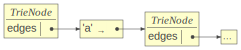

In [17]:
from lolviz import *
root = TrieNode()
add(root, "a")
objviz(root)

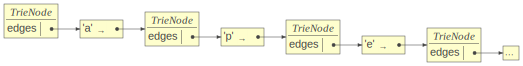

In [18]:
add(root, "ape")
objviz(root)

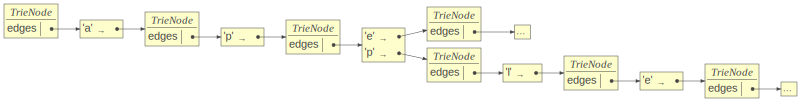

In [19]:
add(root, "apple")
objviz(root)

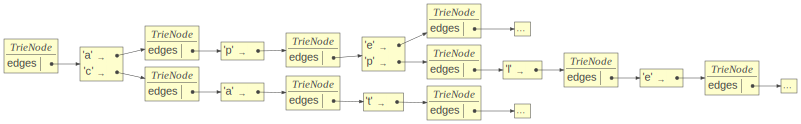

In [20]:
add(root, "cat")
objviz(root)

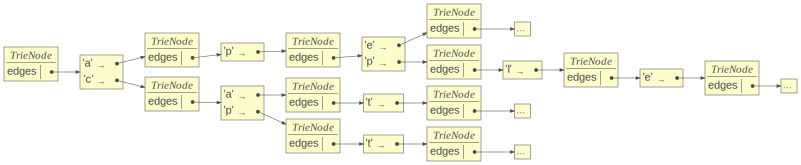

In [21]:
add(root, "cpt")
objviz(root)

## Searching

In [22]:
def search(root:TrieNode, s:str, i=0) -> bool:
    "Return true if s is prefix of word in Trie or full word in Trie"
    p = root
    while p is not None:
        if i>=len(s): return True
        if s[i] not in p.edges: return False
        p = p.edges[s[i]]
        i += 1
    return True

In [23]:
search(root, "apple"), search(root, "appl"), search(root, "ape"), search(root, "apf")

(True, True, True, False)

## Object-oriented version

In [ ]:
class TrieNode:
    def __init__(self):
        self.edges = {}

    def add(self:TrieNode, s:str, i=0) -> None:
        if i>=len(s): return
        if s[i] not in self.edges:
            self.edges[s[i]] = TrieNode()
        self.edges[s[i]].add(s, i+1)

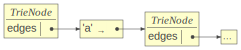

In [26]:
from lolviz import *
root = TrieNode()
root.add("a")
objviz(root)

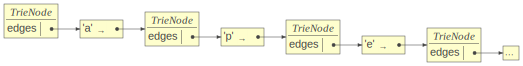

In [27]:
root.add("ape")
objviz(root)

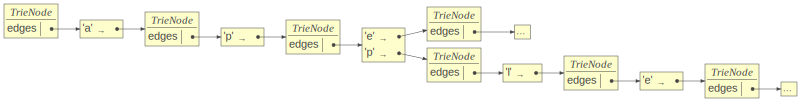

In [28]:
root.add("apple")
objviz(root)

## Fast dictionary implementation

In [29]:
class TrieNode:
    def __init__(self):
        self.edges = [] # init edges, one per a..z letter
        for c in range(ord('a'), ord('z')+1): self.edges.append(None)

In [30]:
def add(p:TrieNode, s:str, i=0) -> None:
    if i>=len(s): return
    e = ord(s[i]) - ord('a')
    if p.edges[e] is None:
        p.edges[e] = TrieNode()
    add(p.edges[e], s, i+1)

In [31]:
def search(root:TrieNode, s:str, i=0) -> bool:
    "Return true if s is prefix of word in Trie or full word in Trie"
    p = root
    while p is not None:
        if i>=len(s): return True
        e = ord(s[i]) - ord('a')
        if p.edges[e] is None: return False
        p = p.edges[e]
        i += 1
    return True

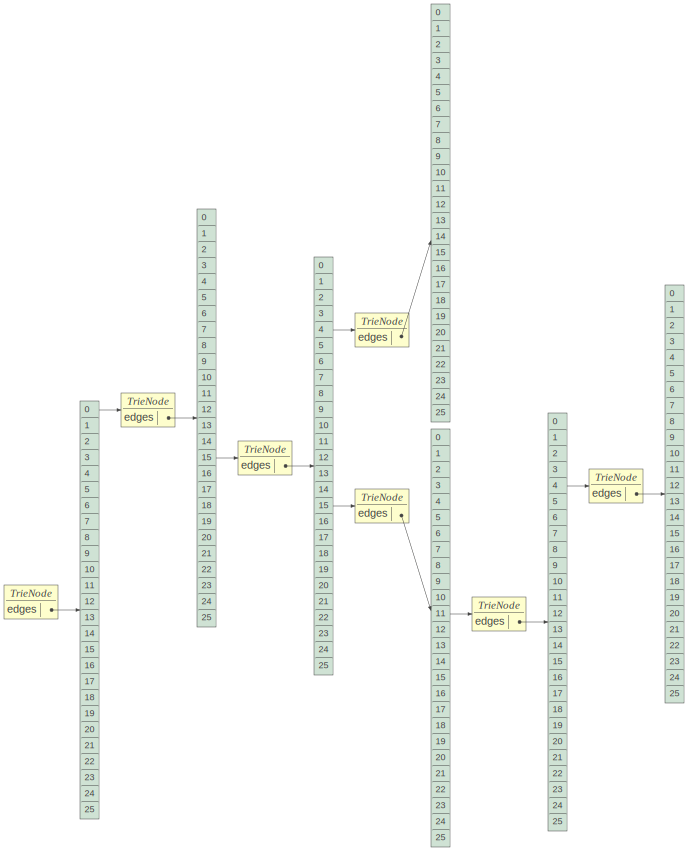

In [32]:
root = TrieNode()
add(root, "ape")
add(root, "apple")
objviz(root)

In [33]:
search(root, "apple"), search(root, "appl"), search(root, "ape"), search(root, "apf")

(True, True, True, False)